In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from patsy import dmatrices

In [273]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import time

In [274]:
df = pd.read_csv('./csv파일/데이터셋_3(심각도).csv',encoding='cp949')

In [275]:
y=pd.DataFrame(df['심각도'])

In [276]:
x=df.drop(['심각도'],axis=1)
x1=pd.get_dummies(x,drop_first=False)
x2=pd.get_dummies(x,drop_first=True)

corolla = pd.concat([x2,y],axis=1)

nCar = corolla.shape[0]
nVar = corolla.shape[1]

print(nCar,nVar)

corolla.info()

58059 45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58059 entries, 0 to 58058
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   사고유형_길가장자리구역통행중   58059 non-null  uint8
 1   사고유형_보도통행중        58059 non-null  uint8
 2   사고유형_차도통행중        58059 non-null  uint8
 3   사고유형_횡단중          58059 non-null  uint8
 4   연령가해자_21-30세      58059 non-null  uint8
 5   연령가해자_31-40세      58059 non-null  uint8
 6   연령가해자_41-50세      58059 non-null  uint8
 7   연령가해자_51-60세      58059 non-null  uint8
 8   연령가해자_61-64세      58059 non-null  uint8
 9   연령가해자_65세이상       58059 non-null  uint8
 10  연령가해자_기타/불명       58059 non-null  uint8
 11  법규위반가해자_그룹2       58059 non-null  uint8
 12  법규위반가해자_그룹3       58059 non-null  uint8
 13  법규위반가해자_기타        58059 non-null  uint8
 14  행동유형가해자_그룹2       58059 non-null  uint8
 15  행동유형가해자_그룹3       58059 non-null  uint8
 16  행동유형가해자_그룹4       58059 non-null  uint8
 17  행동유형가해자_기타/불명     5805

---

---

In [283]:
import warnings 
warnings.filterwarnings('ignore')

In [296]:
train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

In [297]:
X_train_scaled = train_x
X_test_scaled = test_x
y_train = train_y
y_test = test_y

# 로지스틱 회귀를 이용한 coefficient 도출
### 데이터셋_3(심각도)와 달리 k겹 (cv=5이므로 5겹) 교차 검증도 시행

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

log = LogisticRegression()

log_rg = log.fit(X_train_scaled, y_train)
cross_val_score(log_rg, X_train_scaled, y_train, cv=5)
log_rg.score(X_test_scaled, y_test)
print(classification_report(y_test, log_rg.predict(X_test_scaled)))

feature_importance_lr = pd.DataFrame(zip(X.columns.values, log_rg.coef_.ravel()))
feature_importance_lr.columns = ['feature', 'coef']
feature_importance_lr.sort_values("coef", ascending=False, inplace=True)

              precision    recall  f1-score   support

           0       0.60      0.19      0.29      5718
           1       0.70      0.94      0.80     11700

    accuracy                           0.69     17418
   macro avg       0.65      0.56      0.55     17418
weighted avg       0.67      0.69      0.63     17418



## ROC 커브 확인

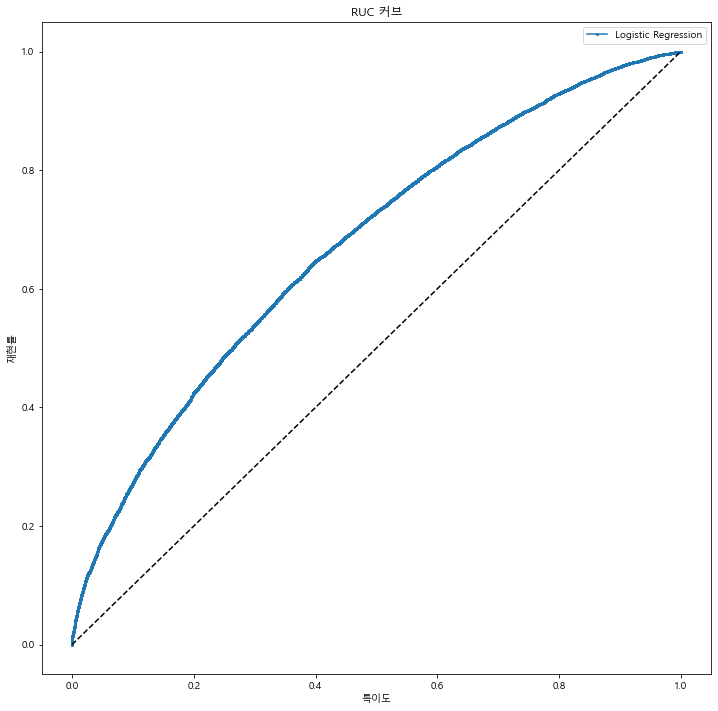

In [299]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
rcParams['figure.figsize'] = 12,12


from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fpr, tpr, threshold = roc_curve(train_y, log.decision_function(train_x))

plt.plot(fpr,tpr, 'o-', ms=2, label="Logistic Regression")
plt.legend()
plt.plot([0,1],[0,1], 'k--',label='radom guess')
plt.xlabel('특이도')
plt.ylabel('재현률')
plt.title('RUC 커브')
plt.show()

## AUC 값 확인
#### AUC 값은 0.5~1의 범위를 가지는데 0.5면 성능이 전혀 없음. 1이면 최고의 성능이라고 할 수 있다.

In [300]:
print('AUC: {}'.format(auc(fpr,tpr)))

AUC: 0.6733708997776093


# 회귀계수 확인

In [301]:
feature_importance_lr

,feature,coef
12,법규위반가해자_그룹3,2.541437
22,피해자신체상해주부위_그룹6,1.794497
21,피해자신체상해주부위_그룹5,1.280126
20,피해자신체상해주부위_그룹4,0.947068
23,피해자신체상해주부위_기타/불명,0.711747
41,발생시각_새벽~아침,0.589214
19,피해자신체상해주부위_그룹3,0.550614
3,사고유형_횡단중,0.356947
38,도로선형_내리막,0.290509
14,행동유형가해자_그룹2,0.267492


# 랜덤포레스트를 이용한 영향력 도출


In [302]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10).fit(X_train_scaled, y_train)
cross_val_score(rf, X_train_scaled, y_train, cv=3)
rf.score(X_test_scaled, y_test)
print(classification_report(y_test, rf.predict(X_test_scaled)))

feature_importance_rf = pd.DataFrame(zip(X.columns.values, rf.feature_importances_))
feature_importance_rf.columns = ['feature', 'importance']
feature_importance_rf.sort_values("importance", ascending=False, inplace=True)

              precision    recall  f1-score   support

           0       0.44      0.36      0.40      5718
           1       0.71      0.78      0.74     11700

    accuracy                           0.64     17418
   macro avg       0.58      0.57      0.57     17418
weighted avg       0.62      0.64      0.63     17418



In [303]:
feature_importance_rf

,feature,importance
43,발생시각_출퇴근시간,0.071629
36,도로형태_단일로,0.059626
26,차량용도가해자_그룹4,0.059049
11,법규위반가해자_그룹2,0.043033
7,연령가해자_51-60세,0.036218
3,사고유형_횡단중,0.034870
6,연령가해자_41-50세,0.033670
14,행동유형가해자_그룹2,0.031414
42,발생시각_저녁~자정,0.030136
5,연령가해자_31-40세,0.029368


# 반복적 변수 제거 방식을 이용한 변수별 중요도 도출

In [304]:

from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=5, random_state=42), n_features_to_select = 5)
select.fit(X_train_scaled, y_train)

feature_importance_rfe = pd.DataFrame(zip(X.columns.values, select.get_support()))
feature_importance_rfe.columns = ['feature', 'importance']
feature_importance_rfe.sort_values("importance", ascending=False, inplace=True)

In [305]:
feature_importance_rfe

,feature,importance
3,사고유형_횡단중,True
21,피해자신체상해주부위_그룹5,True
18,피해자신체상해주부위_그룹2,True
10,연령가해자_기타/불명,True
14,행동유형가해자_그룹2,True
0,사고유형_길가장자리구역통행중,False
33,도로종류_지방도,False
27,차량용도가해자_그룹5,False
28,차량용도가해자_기타/불명,False
29,도로종류_군도,False
